# TP 5.1 : Classification avec R

## 1. Données `body` allégées

Nous considérons une nouvelles fois les données `body`.

In [1]:
data_body <- read.table("data/body.csv", header=TRUE, sep=";", dec=",", row.names=1)

### 1.1 Classification ascendante hiérarchique

Grâce à la fonction `dist()`, il est possible de calculer les distances euclidiennes entre toutes les paires d'individus.

In [16]:
distances <- dist(data_body)
distances


           H1        H2        H3        H4        H5        H6        H7
H2  13.081284                                                            
H3  29.805369 21.201415                                                  
H4  17.437890 12.787494 16.011871                                        
H5  22.054931 14.172509 10.549882  7.281483                              
H6  23.558650 12.433423 14.392706 17.158963 14.553007                    
H7  35.283707 23.766784 16.825576 25.948796 20.404901 14.274102          
H8  25.938774 16.164777 13.429073 17.935997 14.460290  7.846655 10.966312
H9   6.946222 15.576585 31.098071 20.232400 24.856186 23.637682 35.604354
H10 24.184499 16.347171 12.605951 18.016381 13.576818 10.887608 15.454773
F1   4.991994 14.456141 32.769193 20.613103 24.525089 25.802907 36.801630
F2  20.415190 19.043109 37.360675 27.217641 28.561162 29.815265 37.513997
F3  10.075217 13.759724 30.296369 16.655630 21.034971 25.562864 36.473415
F4  14.471351 19.136875 39.607575 27.8

In [17]:

cat("Classe de l'objet :", class(distances), "\n")
cat("Type de l'objet :", mode(distances), "\n")
names(distances)
print(summary(distances))

Classe de l'objet : dist 
Type de l'objet : numeric 


NULL

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.975  15.284  22.155  23.925  30.983  66.186 


<div class="alert alert-block alert-success">
    Quelle est la longueur de l'objet créé ? À quoi correspond cette valeur ?
</div>

La fonction `hclust()` permet de mettre en oeuvre une classification ascendante hiérarchique à partir de l'objet `distances` et le dendrogramme correspondant s'affiche avec `plot()`.

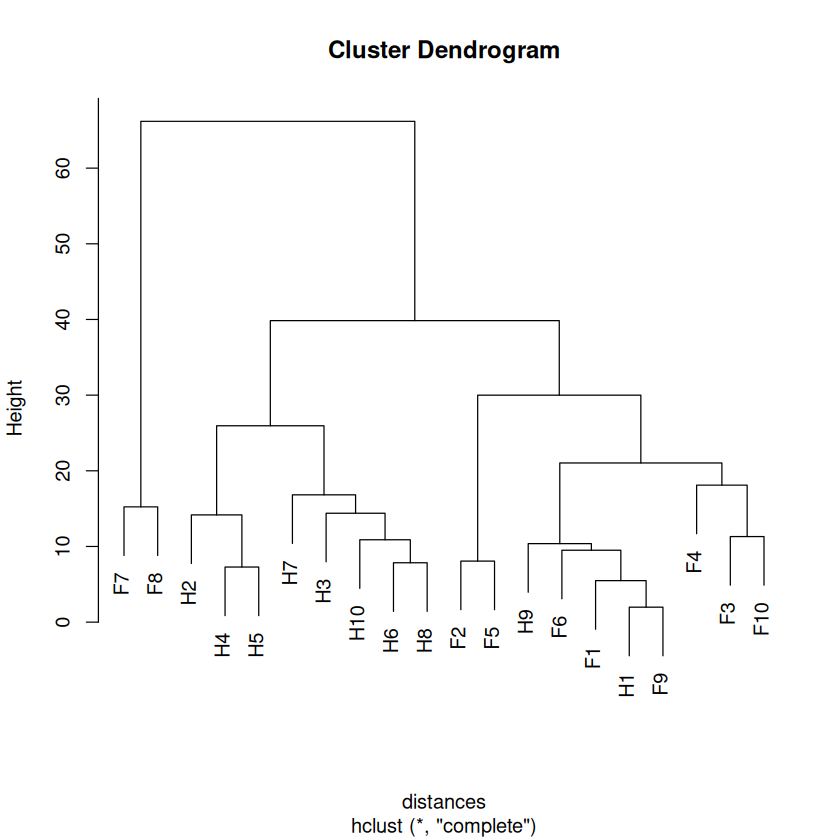

In [ ]:
cah_tree <- hclust(distances)
par(bg = 'white')
plot(cah_tree)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Quel critère d'agglomération est utilisé par défaut par la fonction <code>hclust()</code> ?</li>
        <li>Mettre en oeuvre une classification ascendante hiérarchique en utilisant le critère de Ward comme critère d'agglomération.</li>
        <li>Représenter le dendrogramme associé aux résultats de cette classification.</li>
        <li>En utilisant <code>cah_body&dollar;height</code>, proposer un nombre de groupes raisonnable pour répartir les individus ?</li>
        <li>Utiliser la fonction <code>cutree()</code> avec le nombre de groupes souhaités pour associer chaque individu à un groupe. Les groupes peuvent être visualisés sur le dendrogramme en utilisant la fonction <code>rect.hclust()</code> et l'option <code>border=</code> pour les couleurs.<br>
            <center><img src="img/cah_body.png"></center></li>
        <li>Calculer une ACP des données <code>body</code> et représenter les individus dans le plan principal en donnant une couleur identique aux individus d'un même groupe de votre classification.<br>
            <center><img src="img/cah_acp_body.png"></center></li>
    </ol>
</div>

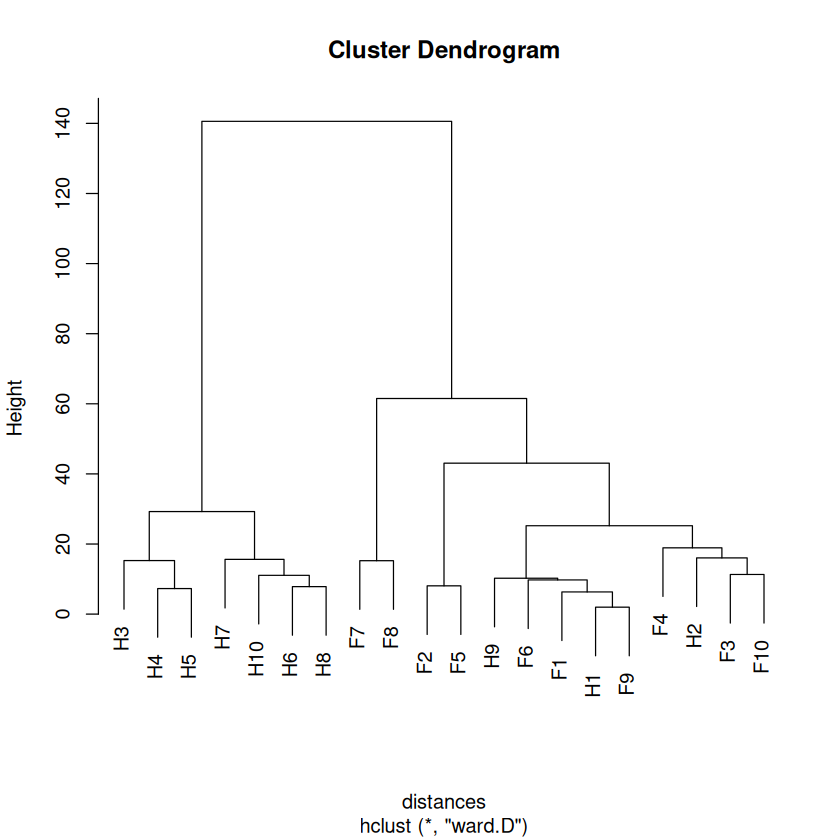

In [37]:
# 1
# la distance par défaut est 'complete', ie maximale.

# 2 et 3
cah_tree <- hclust(distances, method="ward.D")
par(bg = 'white')
plot(cah_tree)


 [1]   1.974842   6.326064   7.281483   7.846655   8.064118   9.750956
 [7]  10.237059  11.064691  11.310172  15.233516  15.280674  15.619757
[13]  16.037836  18.913815  25.215835  29.253569  43.061041  61.515924
[19] 140.587449


integer(0)
[1] "number of groups"
[1] 4
[1] "for # grouping : "
[1] 15


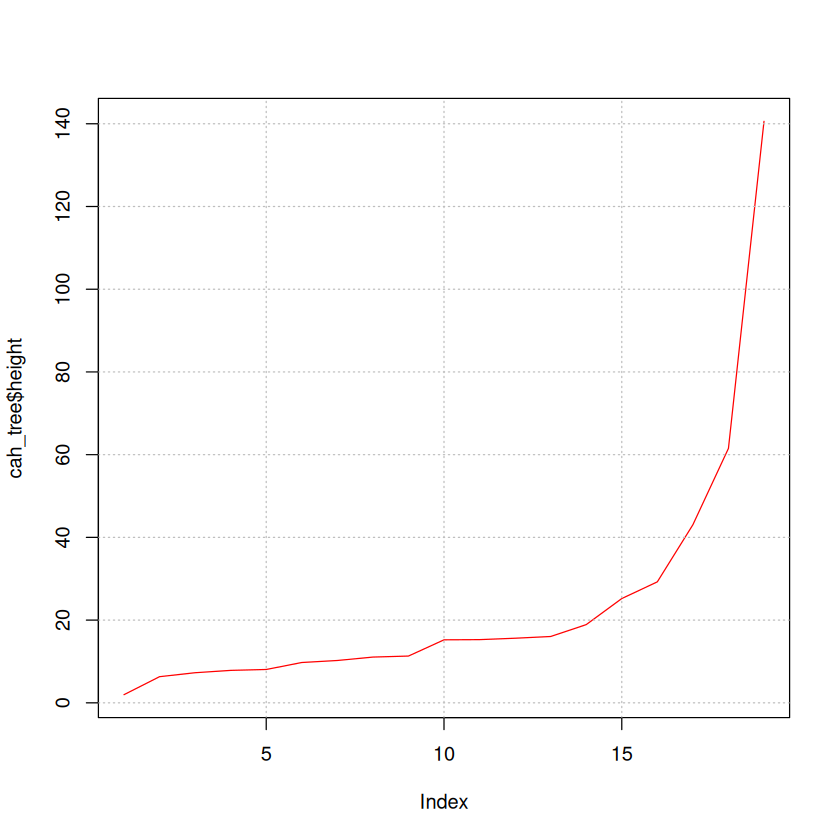

In [42]:
# 4
print(cah_tree$height)
par(bg = 'white')
plot(cah_tree$height, col='red', type='l')
grid(col="gray")

# arbitrairement, d'après le plot, je fixerais height=20 comme limite. Cela donne :
h <- as.integer(cah_tree$height[0]) # marche pas
print(h)
j <- 1

h <- 0 # corrige le problème jsp pourquoi
while (h < 20) {
    j <- j+1
    h <- cah_tree$height[j]
}
print("number of groups")
nk = length(cah_tree$height) - j
print(nk)

print("for # grouping : ")
print(j)

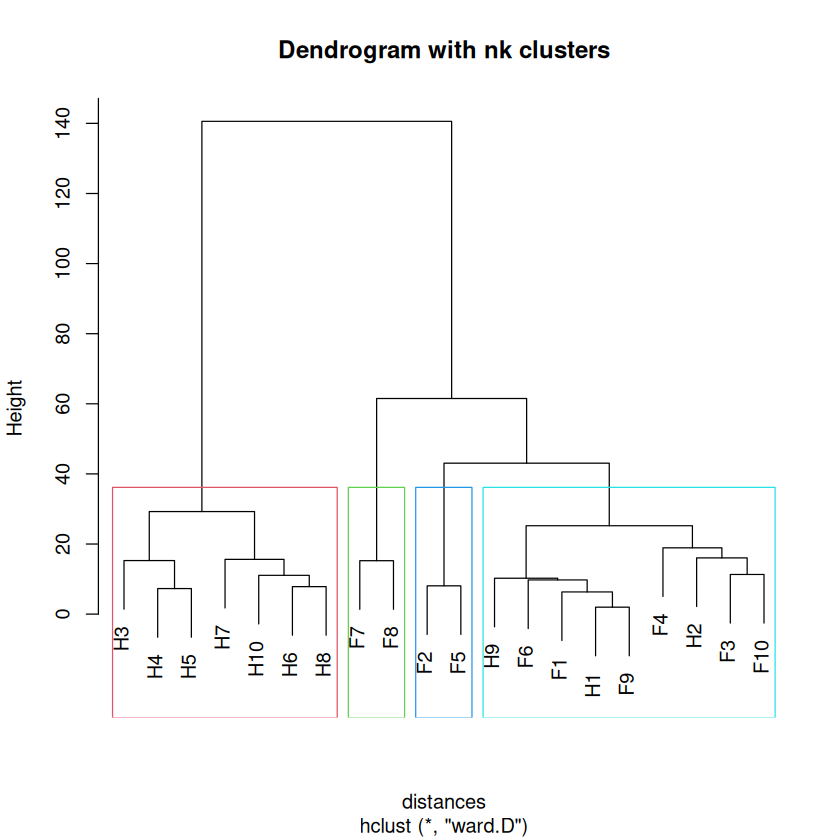

In [51]:
clusters <- cutree(cah_tree, k = nk, h = NULL)
par(bg = 'white')
plot(cah_tree, main = "Dendrogram with nk clusters")
rect.hclust(cah_tree, k = nk, border = 2:(nk+1))

 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  1   1   2   2   2   2   2   2   1   2   1   3   1   1   3   1   4   4   1   1 


[1] "H1"  "H2"  "H3"  "H4"  "H5"  "H6"  "H7"  "H8"  "H9"  "H10" "F1"  "F2" 
[13] "F3"  "F4"  "F5"  "F6"  "F7"  "F8"  "F9"  "F10"

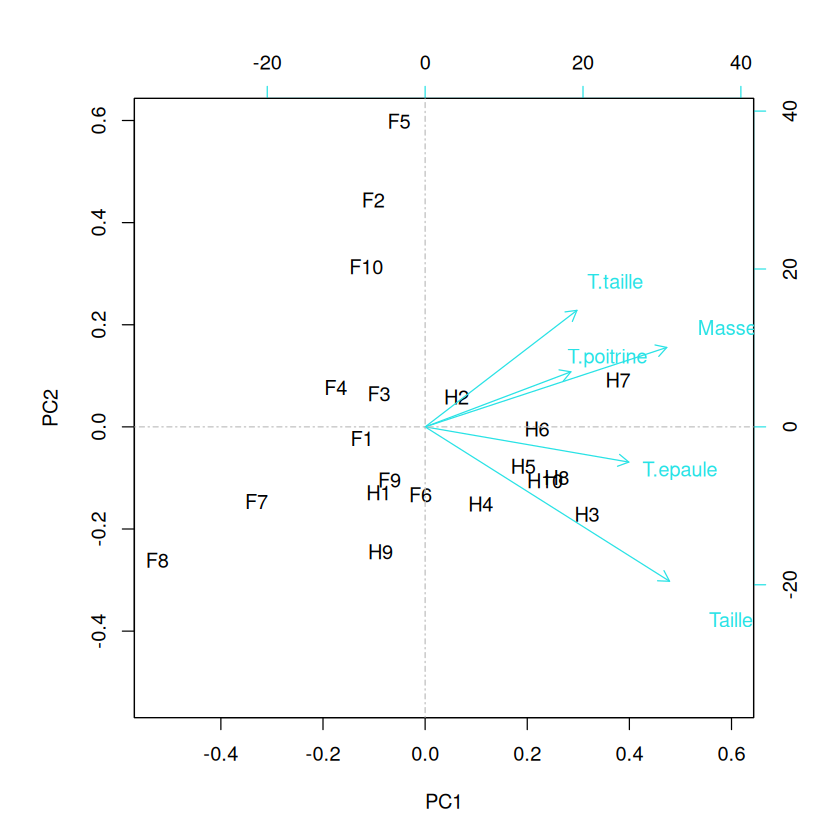

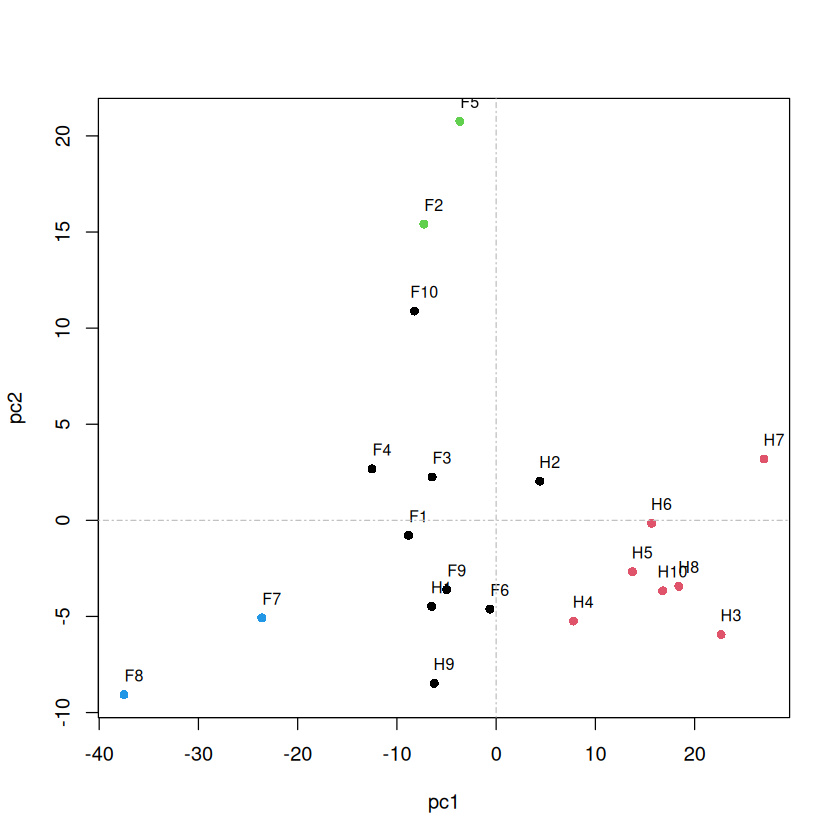

In [96]:
acp_body <- prcomp(data_body)
par(bg = 'white')
biplot(acp_body, col=c(1, 5, 2, 3))
abline(h=0, col="gray", lty=4)
abline(v=0, col="gray", lty=4)

print(clusters)
names(clusters)

pc1 = acp_body$x[, 1]
pc2 = acp_body$x[, 2]
plot(pc1, pc2, col=clusters, xlab="pc1", ylab="pc2", pch = 16)
text(pc1+1, pc2+1, labels=names(clusters), cex= 0.8)
abline(h=0, col="gray", lty=4)
abline(v=0, col="gray", lty=4)

### 1.2 K-means

Pour réaliser un algorithme K-means, il est possible d'utiliser la fonction `kmeans()` avec l'option `centers=` pour définir un nombre entier de groupes.

In [ ]:
# Exemple de K-means à 4 groupes
kmeans_body_1 <- kmeans(data_body, centers=4)
cat("Groupes des individus pour le premier K-means :\n")
print(kmeans_body_1$cluster)

# Un autre exemple de K-means à 4 groupes
kmeans_body_2 <- kmeans(data_body, centers=4)
cat("Groupes des individus pour le second K-means :\n")
print(kmeans_body_2$cluster)

# j'imagine que l'initialisation du k means est aléatoire

Groupes des individus pour le premier K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  3   2   1   2   2   1   1   1   3   1   3   4   4   3   4   2   3   3   3   4 
Groupes des individus pour le second K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  1   1   4   4   4   4   4   4   1   4   1   3   1   1   3   1   2   2   1   3 


<div class="alert alert-block alert-success">
    Expliquer pourquoi les résultats obtenus sont différents.
</div>

Il est possible de construire la table de contingence qui croise les effectifs des 4 groupes obtenus dans les 2 cas avec la fonction `table()`.

In [103]:
table(kmeans_body_1$cluster, kmeans_body_2$cluster, dnn=c("kmeans1  ", "kmeans2"))

         kmeans2
kmeans1   1 2 3 4
        1 0 0 0 5
        2 2 0 0 2
        3 5 2 0 0
        4 1 0 3 0

<div class="alert alert-block alert-success">
    Croiser également l'un des résultats obtenus avec les groupes issus de la classification ascendante hiérarchique.
</div>

In [104]:
table(kmeans_body_1$cluster, clusters, dnn=c("kmeans1  ", "clusters"))

         clusters
kmeans1   1 2 3 4
        1 0 5 0 0
        2 2 2 0 0
        3 5 0 0 2
        4 2 0 2 0

Afin de pallier l'aspect aléatoire de l'algorithme K-means et de stabiliser le résultat d'une classification ascendante hiérarchique, nous pouvons imposer les centres initiaux du K-means comme étant ceux donnés par les groupes de la CAH.

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Calculer les barycentres des classes issues de la classification hiérarchique ascendante et stocker ces résultats en ligne dans une matrice à 5 colonnes.</li>
        <li>Passer cette matrice à l'option <code>centers=</code> de la fonction <code>kmeans()</code>. Est-ce que le résultat est encore aléatoire ?</li>
        <li>Comparer les résultats de cette classification avec ceux de la classification ascendante hiérarchique sous forme d'une table puis sous forme graphique dans le plan principal.</li>
    </ol>
</div>

In [ ]:
# classes issues de la CAH
print(clusters)
# whole dataset
# print(data_body)
# dataset corresponding to group 1, with masking
data_body[clusters==1, ]


# barycentre :
#   ABCDE matrix with five columns
Bbarycenter <- function(ABCDE){
    n = nrow(ABCDE)
    a = sum(ABCDE[, 1]) * 1/n
    b = sum(ABCDE[, 2]) * 1/n
    c = sum(ABCDE[, 3]) * 1/n
    d = sum(ABCDE[, 4]) * 1/n
    e = sum(ABCDE[, 5]) * 1/n
    back = c(a, b, c, d, e)
    print(back)
    return(back)
}
m1 = matrix(,ncol=5) # initialize and append
m1 = rbind(m1, Bbarycenter(data_body[clusters==1, ]))
m1 = rbind(m1, Bbarycenter(data_body[clusters==2, ]))
m1 = rbind(m1, Bbarycenter(data_body[clusters==3, ]))
m1 = rbind(m1, Bbarycenter(data_body[clusters==4, ]))
m1 = m1[-1, ] # delete first row (nan)
print(m1)

 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  1   1   2   2   2   2   2   2   1   2   1   3   1   1   3   1   4   4   1   1 


,T.epaule,T.poitrine,T.taille,Masse,Taille
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
H1,106.2,89.5,71.5,65.6,174.0
H2,110.5,97.0,79.0,71.8,175.3
H9,111.0,91.0,68.5,62.0,175.0
F1,105.0,89.0,71.2,67.3,169.5
F3,99.1,90.8,77.9,68.2,172.7
F4,107.6,97.0,69.6,61.4,162.6
F6,108.4,91.8,69.9,71.8,176.5
F9,107.1,90.9,72.2,66.4,174.0
F10,100.5,97.1,80.4,67.3,163.8


[1] 106.15556  92.67778  73.35556  66.86667 171.48889
[1] 115.75714  99.25714  79.97143  79.04286 185.88571
[1] 102.10  94.75  82.80  76.15 158.75
[1]  95.60  82.70  60.70  52.05 162.55
         [,1]     [,2]     [,3]     [,4]     [,5]
[1,] 106.1556 92.67778 73.35556 66.86667 171.4889
[2,] 115.7571 99.25714 79.97143 79.04286 185.8857
[3,] 102.1000 94.75000 82.80000 76.15000 158.7500
[4,]  95.6000 82.70000 60.70000 52.05000 162.5500


Groupes des individus pour le premier K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  1   1   2   2   2   2   2   2   1   2   1   3   1   1   3   1   4   4   1   3 
Groupes des individus pour le second K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  1   1   2   2   2   2   2   2   1   2   1   3   1   1   3   1   4   4   1   3 


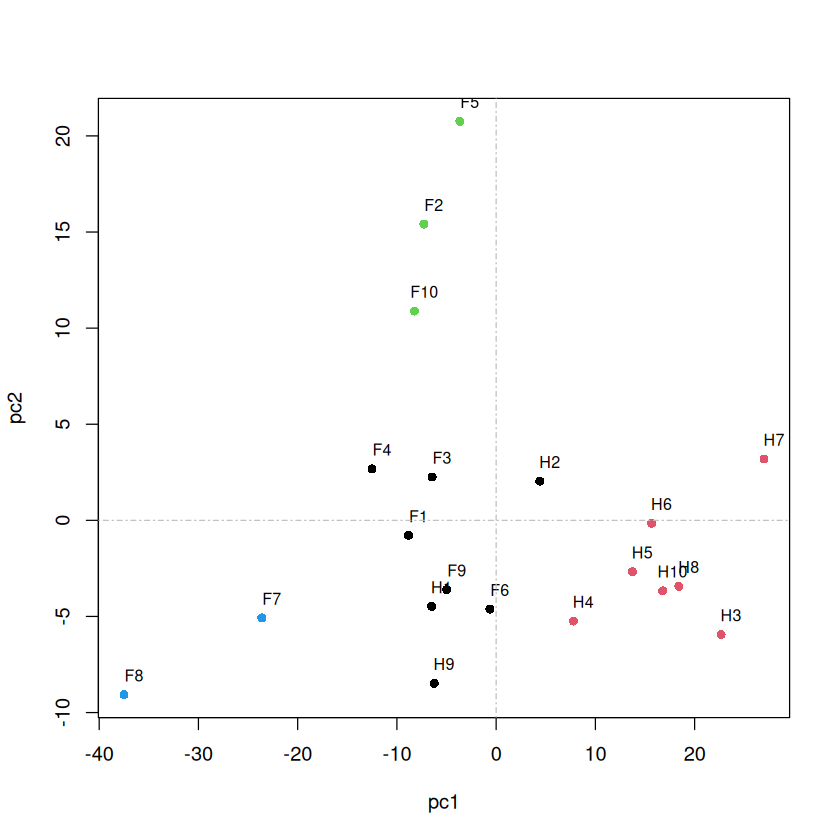

In [ ]:
# 2
# Exemple de K-means à 4 groupes
kmeans_body_1 <- kmeans(data_body, centers=m1)
cat("Groupes des individus pour le premier K-means :\n")
print(kmeans_body_1$cluster)

# Un autre exemple de K-means à 4 groupes
kmeans_body_2 <- kmeans(data_body, centers=m1)
cat("Groupes des individus pour le second K-means :\n")
print(kmeans_body_2$cluster)
# le résultat n'est pas aléatoire

pc1 = acp_body$x[, 1]
pc2 = acp_body$x[, 2]
par(bg = 'white')
plot(pc1, pc2, col=kmeans_body_1$cluster, xlab="pc1", ylab="pc2", pch = 16)
text(pc1+1, pc2+1, labels=names(kmeans_body_1$cluster), cex= 0.8)
abline(h=0, col="gray", lty=4)
abline(v=0, col="gray", lty=4)

# légèrement mieux que précédemment. Les hommes et les femmes sont presque triés (deux groupe exclusivement fémnins, un groupemasculin, un mixte)

## 2. Données `body` complètes

Les données sont consituées de 24 variables quantitatives (diamètres, circonférence, âge, taille, poids, ...) mesurées chez 507 individus hommes et femmes (le sexe étant précisé dans la variable `gender`).

In [138]:
data_body_full <- read.table("data/data-body.csv", sep=";", dec=",", header=TRUE)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Procéder à une classification ascendante hiérarchique (distance euclidienne et critère de Ward) sur les individus et représenter le dendrogramme associé.</li>
        <li>En combien de groupes classeriez-vous les individus ?</li>
        <li>Comparer les groupes de la classification à la variable <code>gender</code> à l'aide d'une table.</li>
        <li>Proposer plusieurs façons de caractériser chacun des groupes de la classification (individus moyens par groupe, ACP, ...).</li>
    </ol>
</div>

Warning message in dist(data_body_full):
“NAs introduced by coercion”


  [1]    5.371607    5.876330    6.032896    6.229968    6.258328    6.345930
  [7]    6.510408    6.683313    6.922187    7.142158    7.191575    7.273668
 [13]    7.277248    7.280110    7.286546    7.426024    7.430932    7.483315
 [19]    7.641717    7.687923    7.694270    7.702137    7.794897    7.807582
 [25]    7.817582    7.826238    7.850823    7.903058    8.043502    8.069361
 [31]    8.147725    8.192349    8.224075    8.256311    8.290934    8.312265
 [37]    8.431093    8.472996    8.497750    8.514081    8.633752    8.654238
 [43]    8.717200    8.756279    8.756545    8.809323    8.820549    8.856198
 [49]    8.860023    8.886038    8.888194    8.892295    8.904002    8.970377
 [55]    9.006198    9.105859    9.127568    9.140683    9.164583    9.165720
 [61]    9.172536    9.228014    9.231400    9.237040    9.246058    9.257317
 [67]    9.264066    9.281478    9.284844    9.378055    9.392484    9.398027
 [73]    9.399136    9.425401    9.432877    9.441155    9.44832

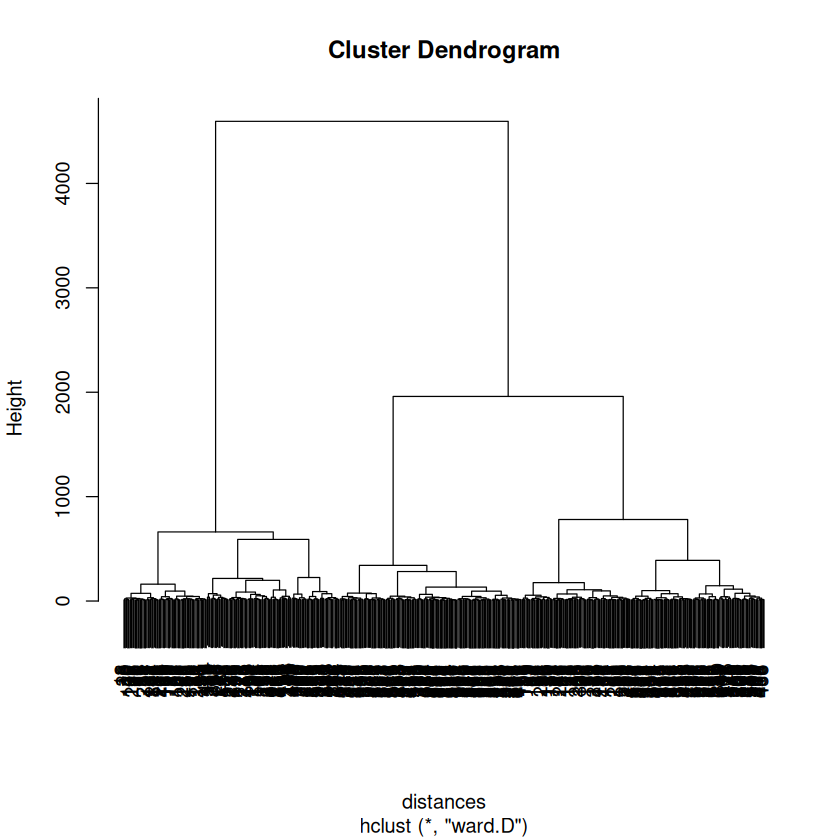

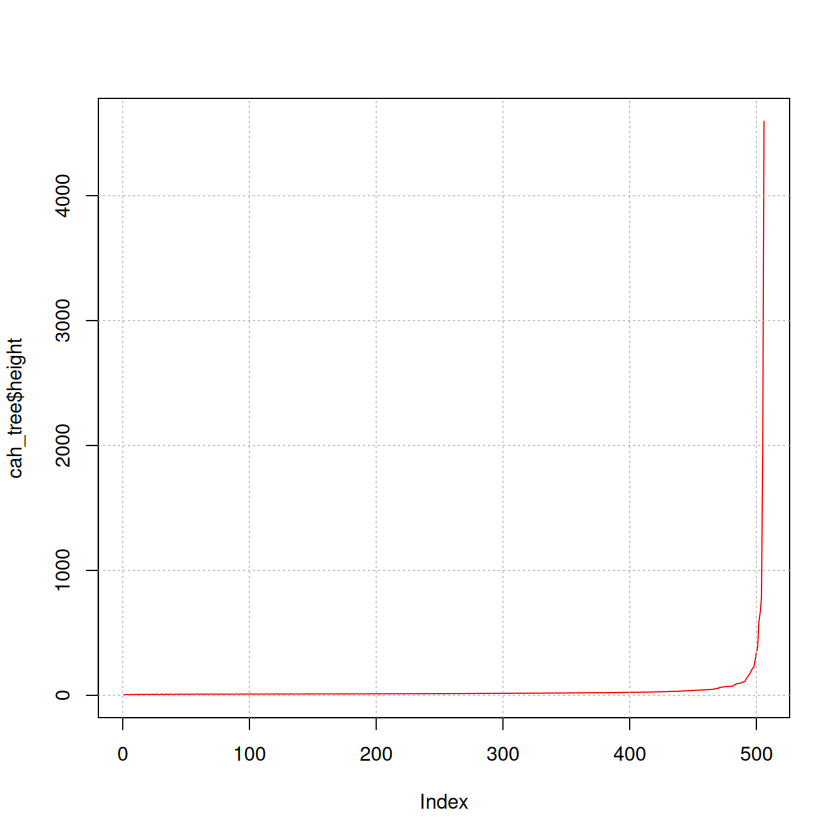

          gender
clusters     F   M
         1 242  94
         2  18 153

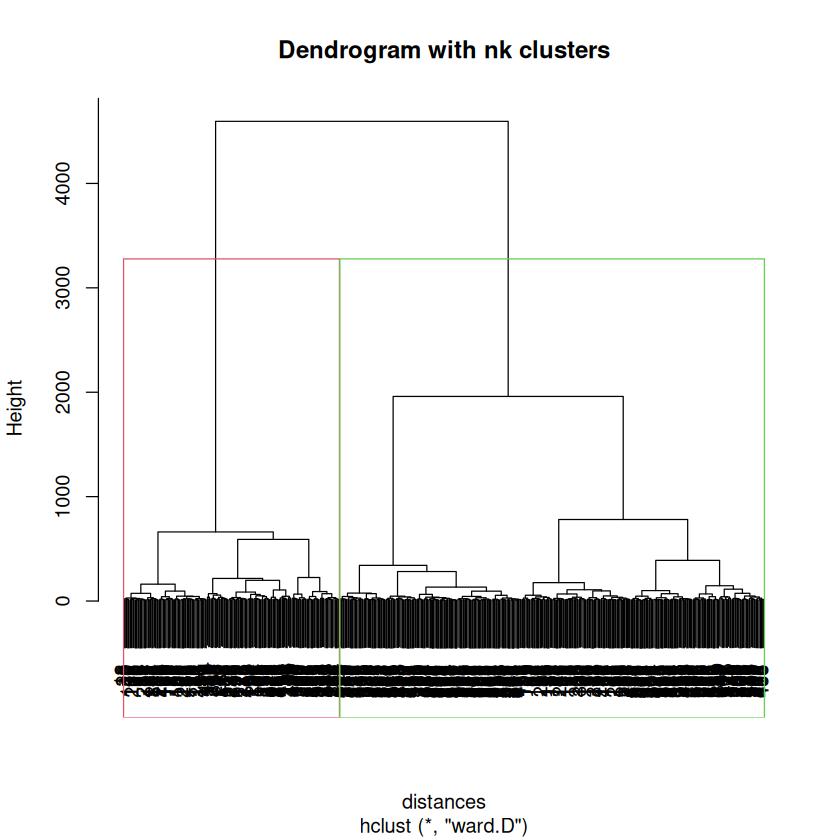

In [ ]:
# distances
distances <- dist(data_body_full)
# la distance par défaut est 'complete', ie maximale.
cah_tree <- hclust(distances, method="ward.D")
par(bg = 'white')
plot(cah_tree)

# plot la hauteur en fonction du nombre de groupe
print(cah_tree$height)
par(bg = 'white')
plot(cah_tree$height, col='red', type='l')
grid(col="gray")
# sépare l'arbre
clusters <- cutree(cah_tree, k = 2, h = NULL)
par(bg = 'white')
plot(cah_tree, main = "Dendrogram with nk clusters")
rect.hclust(cah_tree, k = 2, border = 2:(nk+1))

# affiche la table
table(clusters, data_body_full$gender, dnn=c("clusters  ", "gender"))
# les hommes sont mieux identifiés que les femmes